# Analysis of Apple App Store Strategy Games  

## 1. Background (Business Understanding)

The mobile games industry is developing so fast, with companies spending vast amounts of money on the development and marketing of these games to an equally large market. According to the [newzoo](https://newzoo.com/insights/articles/the-global-games-market-will-generate-152-1-billion-in-2019-as-the-u-s-overtakes-china-as-the-biggest-market/), mobile gaming (smartphone and tablet) is largest segment of gaming market in 2019, which is 68.5 billion dollars (45% of the global games market). Of this, 54.9 billion dollars will come from smartphone games.

The data used here includes 17007 strategy games on the Apple App Store. It was collected on the 3rd of August 2019, using the iTunes API and the App Store sitemap, by the kaggle user Tristan. I downloaded it from the [kaggle datasets](https://www.kaggle.com/tristan581/17k-apple-app-store-strategy-games).


Using this data set, I will try to find what makes a popular strategy game.

## 2. The summary of the data (Data Understanding)

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta, date
import numpy as np
from scipy.stats import chi2_contingency

In [2]:
data = pd.read_csv('E:\\files\\data scientist\\blog\\data\\17k-apple-app-store-strategy-games\\appstore_games.csv')

The first 5 rows of the data:

In [3]:
data.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


The data has 18 colums (listed below). 

| Columns | Type | Meaning |
| --- | --- | --- |
| URL | Text | The URL of the game |
| ID | Int | The assigned ID |
| Name | Text | The name of the game |
| Subtitle | Text | The secondary text under the name |
| Icon URL | Text | The URL of the game icon|
| Average User Rating | Float | Average user rating rounded to nearest 0.5, requires at least 5 ratings|
| User Rating Count | Int | Number of ratings internationally, null means it is below 5|
| Price | Float | Price in USD |
| In-app Purchases | Float | Prices of available in-app purchases|
| Description | Text | App description |
| Developer | Text | App developer |
| Age Rating | Text | Either 4+, 9+, 12+ or 17+ |
| Languages | Text | ISO2A language codes |
| Size | Int | Size of the app in bytes |
| Primary Genre | Text | The main genre |
| Genres| Text | Genres of the app |
| Original Release Date| Date | When it was released |
| Current Version Release Date| Date | When it was last updated |

## 3. Data Preparation

First, the URL, ID, Description and Icon URL will be removed from this analysis.

In [4]:
data = data.drop(columns=['URL', 'ID', 'Icon URL', 'Description'])

Then, check missing values of the dataset:

In [5]:
data.isna().sum()

Name                                0
Subtitle                        11746
Average User Rating              9446
User Rating Count                9446
Price                              24
In-app Purchases                 9324
Developer                           0
Age Rating                          0
Languages                          60
Size                                1
Primary Genre                       0
Genres                              0
Original Release Date               0
Current Version Release Date        0
dtype: int64

Check the proportion of missing:

In [6]:
data.isna().sum()/len(data)

Name                            0.000000
Subtitle                        0.690657
Average User Rating             0.555418
User Rating Count               0.555418
Price                           0.001411
In-app Purchases                0.548245
Developer                       0.000000
Age Rating                      0.000000
Languages                       0.003528
Size                            0.000059
Primary Genre                   0.000000
Genres                          0.000000
Original Release Date           0.000000
Current Version Release Date    0.000000
dtype: float64

About 69.0% of Subtitle are missing, which means that 69.0% of games do not have subtitles. 55.5% of Average User Rating and User Rating Count are missing, meaning that 55.5% of games have User Rating Count below 5. 54.8% of games do not have any in-app Purchases.

In this analysis, I will analyze what makes a popular strategy game. So I will only use records with valid average user rating and user rating count larger than 5.

In [7]:
data_final = data[data['Average User Rating'].notna()].copy()

Check missings again:

In [8]:
data_final.isna().sum()

Name                               0
Subtitle                        4837
Average User Rating                0
User Rating Count                  0
Price                              0
In-app Purchases                2927
Developer                          0
Age Rating                         0
Languages                         24
Size                               0
Primary Genre                      0
Genres                             0
Original Release Date              0
Current Version Release Date       0
dtype: int64

There are still 24 missings in the size variable, but it is OK.

As the data was collected on the 3rd of August 2019, any records with Original Release Date or Current Version Release Date later than that day will be regarded as outliers and be removed:

In [9]:
data_final['Original Release Date'] = pd.to_datetime(data_final['Original Release Date'])
data_final['Current Version Release Date'] = pd.to_datetime(data_final['Current Version Release Date'])

In [10]:
data_final = data_final[(data_final['Original Release Date'].dt.date <= date(2019, 8, 3)) & (data_final['Current Version Release Date'].dt.date <= date(2019, 8, 3))]

In [11]:
data_final.shape

(7228, 14)

There are 7228 records and 14 variables in the fianl dataset.

## 4. What makes a popular strategy game? (Modeling and Evaluation)

### 4.1 The parameter of popularity

What makes a popular strategy game? To answer this question, we need to define a parameter of popularity. The download count will be the best choice. But the data I have did not contain the download count. We can use the 'User Rating Count' in the dataset as the estimator of popularity. 

However, the User Rating Count is not so comparable between games. Different games have differnet release date and life period. Games which released earlier had more time to accumulate more rating counts than newly-released games. So, It is not fair to compare the User Rating Count between old and new games.

To make User Rating Count comparable, I made a new variable called 'User Rating Count per Day'. It is calculated as:

**Days from Release = Cuerrent Date - Original Release Date (Cuerrent Date is 3rd August 2019)**


**User Rating Count per Day = User Rating Count / Days from Release**


In [12]:
data_final['Days from Release'] = (date(2019, 8, 3) - data_final['Original Release Date'].dt.date).dt.days
data_final['Days from Release'] = data_final['Days from Release'].apply(lambda x: 1 if x <= 0 else x)

In [13]:
data_final['User Rating Count per Day'] = data_final['User Rating Count']/data_final['Days from Release']

Plot the distribution of User Rating Count per Day:

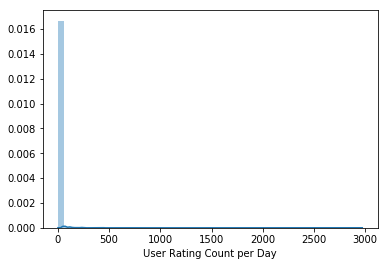

In [14]:
sns.distplot(data_final['User Rating Count per Day'])

The distribution is highly positively skewed: Most of the games have the User Rating Count per Day nearly 0. To know more about the distribution, check some statistics:

In [15]:
data_final['User Rating Count per Day'].describe()

count    7228.000000
mean        3.477717
std        50.573804
min         0.001394
25%         0.010283
50%         0.040541
75%         0.256975
max      2972.500000
Name: User Rating Count per Day, dtype: float64

In [16]:
data_final['User Rating Count per Day'].quantile(0.90)

2.0

We can see that the max is 2972.5, but the 75% quantile is 0.2 and 90% quantile is only 2. This means that 90% of the game has less than 2 persons make reviews per day! We can know that the rule of moblie trategy game market is **'winner takes all':** A few top 'winner' games attracted most of the users. Most of games are 'losers', whose user groups are small. 

Next, I label the top 10% of games as 'winner' and the remaining 90% as 'loser'. I will analyze the differnece between the 'winner' group and the 'loser' group and try to find what makes a popular strategy game.

In [17]:
data_final['Winner or Loser'] = data_final['User Rating Count per Day'].apply(lambda x: 'winner' if x > 2 else 'loser')

### 4.2 Which kind of charging mode associated with popularity?

There are 4 ways for a mobile game to charge and make profits:

1. Free download, with in-app purchase (Make profits on in-app purchase only).
2. Free download, without in-app purchase (Probably make profits on advertising).
3. Charge for download, with in-app purchase (Make profits on both paid download and in-app purchase).
4. Charge for download, without in-app purchase (Make profits on paid download only).

Which one is the best mode to make a popular game?

First, labels of charging modes should be created:

In [18]:
data_final['Charging Mode'] = 'Free download, with IAP'
data_final.loc[(data_final['Price'] == 0) & (data_final['In-app Purchases'].notna()), ['Charging Mode']] = 'Free download, with IAP'
data_final.loc[(data_final['Price'] == 0) & (data_final['In-app Purchases'].isna()), ['Charging Mode']] = 'Free download, without IAP'
data_final.loc[(data_final['Price'] > 0) & (data_final['In-app Purchases'].notna()), ['Charging Mode']] = 'Paid download, with IAP'
data_final.loc[(data_final['Price'] > 0) & (data_final['In-app Purchases'].isna()), ['Charging Mode']] = 'Paid download, without IAP'

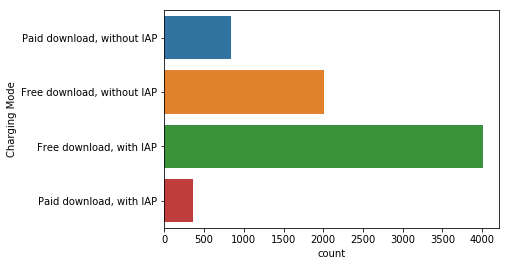

In [19]:
sns.countplot(y="Charging Mode", data=data_final)

The free download, with in-app purchase (IAP) is the most common charging mode. The free download, without in-app purchase is the second most common charging mode. There are much fewer games use the other 2 charging modes.

What about the difference in charging mode between winners and losers?

In [20]:
percent_table = pd.crosstab(data_final['Charging Mode'], data_final['Winner or Loser']).apply(lambda x: x/x.sum(), axis=0)

In [21]:
percent_table

Winner or Loser,loser,winner
Charging Mode,,
"Free download, with IAP",0.528435,0.795014
"Free download, without IAP",0.299877,0.087258
"Paid download, with IAP",0.048417,0.066482
"Paid download, without IAP",0.123271,0.051247


In [22]:
percent_table_long = pd.melt(percent_table.reset_index(), id_vars=['Charging Mode'], value_vars=['loser', 'winner'])

Text(0.5, 0, 'Proportion')

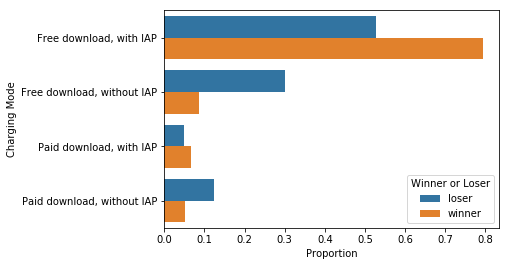

In [23]:
sns.barplot(y="Charging Mode", x="value", hue="Winner or Loser", data=percent_table_long)
plt.xlabel("Proportion")

We can see that the free download, with IAP mode is more common among winners compared with losers (80.0% v.s. 52.8%). Meanwhile, the free download, without IAP mode is less common among winners compared with losers (8.7% v.s. 30.0%). 

**We can infer that popular games tend to use free download to attract users and use in-app purchases to make profits.**

### 4.3 Is average user rating associated with popularity?

Intuitively, the game with high rating tends to be popular, because only acclaimed games can attract large amount of users.

In this part, I am going to investigate the relation between average user rating and popularity.

In [24]:
data_final.groupby(['Winner or Loser']).mean()['Average User Rating']

Winner or Loser
loser     4.013142
winner    4.397507
Name: Average User Rating, dtype: float64

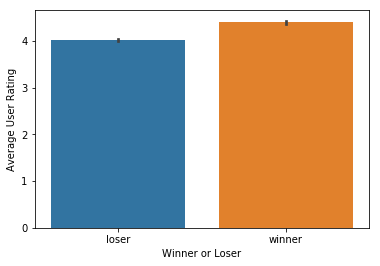

In [25]:
sns.barplot(x="Winner or Loser", y="Average User Rating", estimator=np.mean, data=data_final)

The winners' mean user rating is higher than that of the losers (4.0 vs 4.4).

Then, plot the difference of rating distribution:

In [26]:
percent_table = pd.crosstab(data_final['Average User Rating'], data_final['Winner or Loser']).apply(lambda x: x/x.sum(), axis=0)

In [27]:
percent_table

Winner or Loser,loser,winner
Average User Rating,,
1.0,0.002152,0.000000
1.5,0.009222,0.000000
2.0,0.023363,0.000000
2.5,0.046111,0.009695
3.0,0.075008,0.022161
3.5,0.132647,0.058172
4.0,0.237319,0.139889
4.5,0.348601,0.613573
5.0,0.125576,0.156510


In [27]:
percent_table_long = pd.melt(percent_table.reset_index(), id_vars=['Average User Rating'], value_vars=['loser', 'winner'])

Text(0, 0.5, 'Proportion')

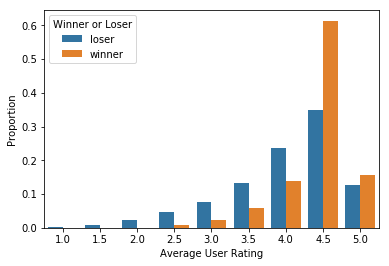

In [28]:
sns.barplot(x="Average User Rating", y="value", hue="Winner or Loser", data=percent_table_long)
plt.ylabel("Proportion")

We can see that the winner group have fewer low-rating games (rating less than 4.5, 23.0% v.s. 52.6%) and more high-rating games (rating more than or equal to 4.5, 77.0% v.s. 47.4%). 

**We can draw the conclusion that game with high rating (>= 4.5) is more likely to be popular.**

### 4.3 Is size associated with popularity?

The larger games may have better and more content which can attract more users. In this part, I am going to investigate the relation between size and popularity.

In [29]:
data_final.groupby(['Winner or Loser']).mean()['Size']

Winner or Loser
loser     1.303953e+08
winner    2.950661e+08
Name: Size, dtype: float64

In [35]:
data_final.groupby(['Winner or Loser']).median()['Size']

Winner or Loser
loser      68202496.0
winner    178507776.0
Name: Size, dtype: float64

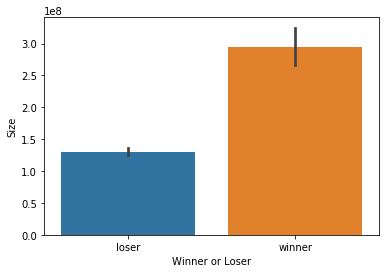

In [37]:
sns.barplot(x="Winner or Loser", y="Size", estimator=np.mean, data=data_final)

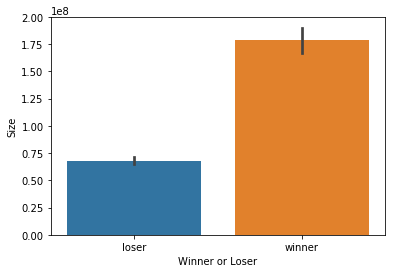

In [38]:
sns.barplot(x="Winner or Loser", y="Size", estimator=np.median, data=data_final)

In terms of both mean and median, the winners have larger size than the losers. The median and mean size of winners is as twice of losers.

Next, I am going to investigate it detailly:

In [32]:
data_final['Size'].describe()

count    7.228000e+03
mean     1.468441e+08
std      2.523184e+08
min      2.158400e+05
25%      2.959590e+07
50%      7.557683e+07
75%      1.723566e+08
max      4.005591e+09
Name: Size, dtype: float64

In [33]:
data_final['Size Stratum'] = 'medium'
data_final.loc[data_final['Size'] > data_final['Size'].quantile(0.75), ['Size Stratum']] = 'large'
data_final.loc[data_final['Size'] < data_final['Size'].quantile(0.25), ['Size Stratum']] = 'small'

I divided games into three groups based on size: 
1. small (less than 28MB, the 25% quantile)
2. medium (between 28MB and 164MB, between 25% and 75% quantile)
3. large (larger than 164MB, the 75% quantile)

Then, plot the difference of size distribution:

In [34]:
percent_table = pd.crosstab(data_final['Size Stratum'], data_final['Winner or Loser']).apply(lambda x: x/x.sum(), axis=0)
percent_table_long = pd.melt(percent_table.reset_index(), id_vars=['Size Stratum'], value_vars=['loser', 'winner'])

In [39]:
percent_table

Winner or Loser,loser,winner
Size Stratum,,
large,0.219797,0.520776
medium,0.511067,0.401662
small,0.269136,0.077562


Text(0, 0.5, 'Proportion')

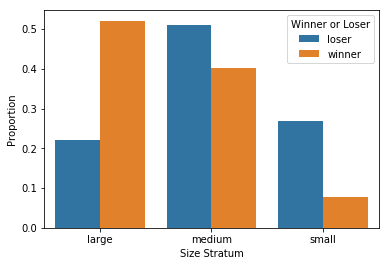

In [58]:
sns.barplot(x="Size Stratum", y="value", hue="Winner or Loser", data=percent_table_long)
plt.ylabel("Proportion")

We can see that the winner group have much more large games (52.1% v.s. 22.0%) and much less small games (7.8% v.s. 27.0%).

**So, we can draw the conclusion that large games are more likely to be popular.**

## 5. Conclusion and Discussion (Evaluation and Deployment)

In this article, I analyzed the Apple App Store Strategy Games data and tried to find what makes a popular strategy game. Firstly, I defined a parameter of popularity: User Rating Count per Day. Then I studied the association between popularity and charging mode, rating, size. I found that games with the free download and IAP (In-app purchase) charging mode, highly rated and larger size are more likely to be popular. 

However, the conclusion is not so solid. Firstly, the User Rating Count is not a good parameter of popularity, because not all users want bother to grade a game, even they are super fans. I think the Download Count may be better. Secondly, the causal relationship between popularity and the factors is not clear. It is hard to say that those factors 'make' popular games: For example, larger games may have better and more game features which attarct more users and make games popular. However, the truth can also be that game developers will only keep updating popular games, their cash cows, and discard unpopular games. And it is updating makes popular games larger and larger. In other words, popularity can lead to increase of size. To get the real causality, more efforts need to be done.